## Разведочный анализ данных по Kiva.org

###  1. Kiva и её деятельность

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

Kiva — это некоммерческая организация, которая позволяет нуждающимся более чем в 80 странах мира получать финансирование под различного рода проекты и нужды.

Девиз Kiva — **Make a loan, change a life**.

В основном деятельность Kiva связана с поддержкой населения, развитием малого бизнеса, а также финансированием социальных проектов. 

Список заявок, назначений и стран, нуждающихся в финансировании, можно посмотреть на сайте [kiva.org](https://www.kiva.org).
Это темы, так или иначе связанные с сельским хозяйством, питанием, здоровьем и гигиеной, розничной торговлей и поддержкой малого бизнеса.


### 1.1. Kiva в цифрах

**На сегодняшний день Kiva выделила более одного миллиарда долларов двум миллионам заемщиков и считается одним из главных участников борьбы с бедностью, особенно во многих африканских странах.**

* За время существования Кива помогла 2,7 млн нуждающимся
* 1,7 млн небезразличных участников, желающих помочь
* 83 страны
* Сумма средств, выделенных через Kiva, составляет $1,11 млрд
* 97,0% — доля возврата средств инвесторам (очень высокий показатель)
* 81% заемщиков Kiva — женщины
* Кредит Kiva финансируется каждые две минуты

### 1.2. Как работает Kiva

<img src="https://miro.medium.com/max/1400/1*I-5sWkHtvaSSkYfCs-PptA.png" width="1024" height="737" />

### 1.3. Набор данных от Kiva

**kiva_loans** — это набор данных, который содержит большую часть информации о займах:
- id — уникальный идентификатор для кредита;
- funded_amount — сумма, выплаченная Kiva агенту на местах (USD);
- loan_amount — сумма, выплаченная полевым агентом заёмщику (USD);
- sector — сектор использования займа;
- activity — более гранулированная категория;
- use — назначение использования суммы кредита;
- country_code — ISO-код страны страны, в которой был выдан заём;
- country — полное название страны, в которой был выдан кредит;
- posted_time — время, в которое заявка была опубликована на Kiva;
- disbursed_time — время, когда кредитный агент выдал заёмщику сумму;
- funded_time — время, когда заявка полностью финансируется кредиторами;
- term_in_months — срок, на который был выдан кредит, в месяцах;
- lender_count — общее количество кредиторов, которые внесли свой вклад в этот кредит;
- loaner_genders — разделённые запятыми буквы M и F, где каждый экземпляр представляет одного мужчину / одну женщину в группе.

**kiva_mpi_region_locations** — набор данных, содержащий данные о регионах и показатели MPI. Global Multidimensional Poverty Index — глобальный индекс бедности ряда регионов (субнациональных) в мире. Чем больше это значение, тем выше бедность в соответствующем регионе:
- country — страна;
- region — регион в стране;
- world_region — часть света;
- MPI — многомерный индекс бедности;
- geo — координаты (широта, долгота).




## 2. Разведочный анализ данных

In [214]:
# Импортируем все необходимые библиотеки:

import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')
import os

import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

In [215]:
# Загрузим данные:

df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_mpi = pd.read_csv("kiva_mpi_region_locations.csv")

In [216]:
# Проверим, что данные загрузились корректно, выведя на экран первые три строчки каждого датасета:

df_kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [217]:
df_mpi.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


### Пропуски

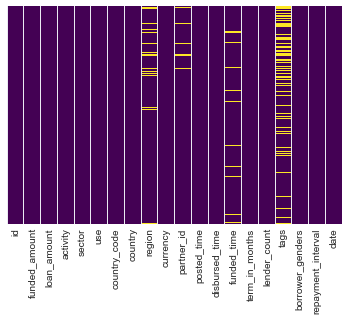

In [218]:
# Сделаем визуализации для проверки наличия пропусков в двух наборах данных:

sns.heatmap(df_kiva_loans.isnull(),cbar=False, yticklabels=False, cmap = 'viridis')

plt.show()

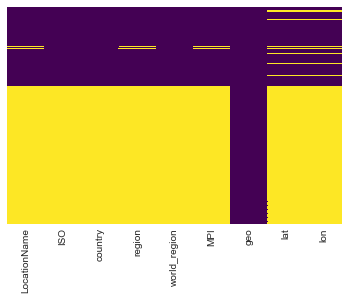

In [219]:
sns.heatmap(df_mpi.isnull(),cbar=False, yticklabels=False, cmap = 'viridis')

plt.show()

In [220]:
# Мы видим две тепловые карты, на которых жёлтым цветом выделены пропуски

# В первом датасете, например, можем заметить, что больше всего пропущенных значений в колонке tags
# А во втором - что пропусков везде довольно много, кроме колонки geo

In [221]:
# Помимо визуализаций, наличие пропусков можно отследить так:

df_kiva_loans.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [222]:
df_mpi.isnull().sum()

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

<AxesSubplot:>

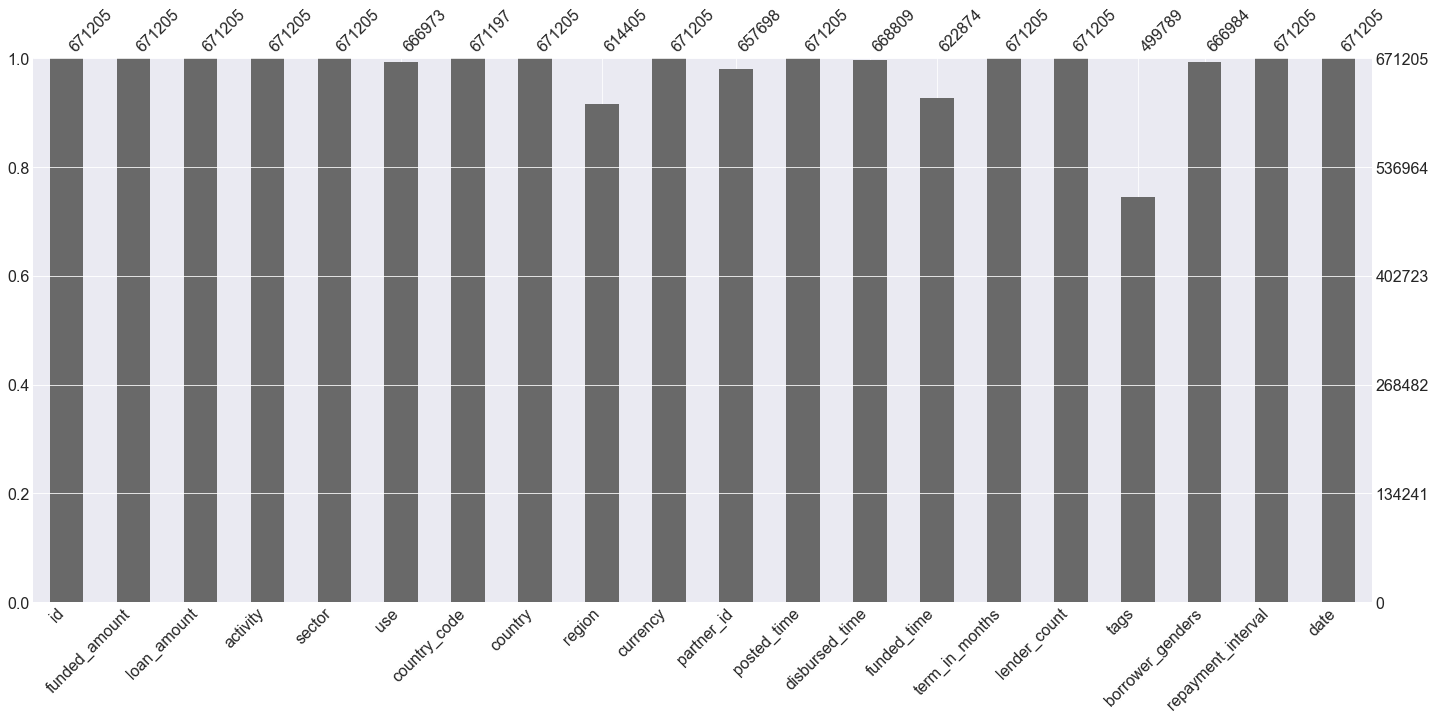

In [223]:
# И так - команда bar из библиотеки missingno построит процентное содержание пропущенных значений по каждой из колонок:

msno.bar(df_kiva_loans)

<AxesSubplot:>

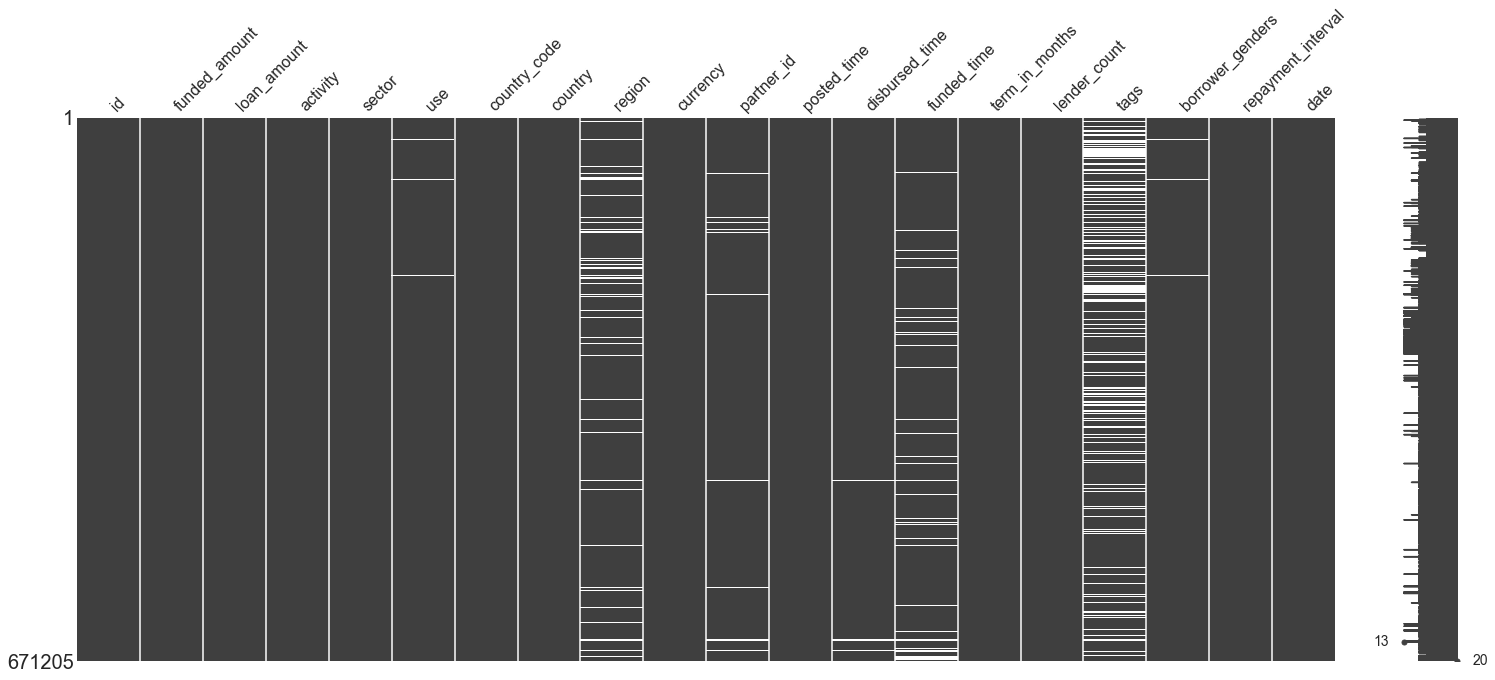

In [224]:
# А команда matrix выдаст нам структурное содержание пропущенных значений, т е их распределение внутри самого датасета:

msno.matrix(df_kiva_loans)

In [225]:
# Метод info() покажет число ненулевых значений каждого столбца, 
# и мы сразу можем отследить, к какому типу данных относятся признаки.
# А так же сравнить число ненулевых значений каждого признака с количеством строк датасетов:

df_kiva_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-nul

In [226]:
df_mpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LocationName  984 non-null    object 
 1   ISO           1008 non-null   object 
 2   country       1008 non-null   object 
 3   region        984 non-null    object 
 4   world_region  1008 non-null   object 
 5   MPI           984 non-null    float64
 6   geo           2772 non-null   object 
 7   lat           892 non-null    float64
 8   lon           892 non-null    float64
dtypes: float64(3), object(6)
memory usage: 195.0+ KB


In [227]:
# Так как пропусков в данных немного, выбросим строки, содержащие NaN:

df_kiva_loans.dropna(inplace = True)
df_kiva_loans.shape[0]

423081

In [228]:
df_mpi.dropna(inplace = True)
df_mpi.shape[0]

892

In [229]:
# Новая длина таблиц составляет:

# 423 081 для df_kiva_loans
# 892 для df_mpi

### Пользователи Kiva

Теперь, когда мы знаем, какие типы признаков присутствуют в данных, когда все пропуски обработаны, перейдем к постановке гипотез и их проверке.

### 1 - Люди какого пола обращаются за финансированием?

In [230]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                      263421
male                                                                                                                                                                                                                                         84197
female, female, female                                                                                                                                                                                                                        8645
female, female                                                                                                                                                                                                                                8535
female, female, female, fema

Во многих займах, заемщик на самом деле не один человек, а группа людей, у которых есть общий проект. В наборе данных они перечислены как «женщина, женщина, женщина» или «мужчина, женщина». Это объясняет 12к полов, которые мы обнаружили ранее: каждая такая комбинация считается отдельно.

Используем метку **group** для этих заемщиков на круговой диаграмме:

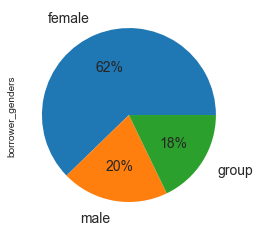

In [231]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]

borrowers = df_kiva_loans['borrower_genders'].value_counts()

plot = borrowers.plot.pie(fontsize=14, autopct='%1.0f%%', labeldistance=1.2, radius=1)

In [232]:
# И в цифрах:

df_kiva_loans.borrower_genders.value_counts()

female    263421
male       84197
group      75463
Name: borrower_genders, dtype: int64

Выясняется, что большинство заемщиков - женщины, и это весьма неожиданно. 

**Что это может означать?**

Например то, что женщины используют Kiva, чтобы получить финансирование и развивать собственные проекты в странах (большинство из которых являются странами третьего мира), где традиционно женщинам это было сделать крайне тяжело.

### 2 - В каких странах подавляющее большинство заемщиков - женщины?

Чтобы получить наиболее (статистически) значимые результаты, оставим только те страны, которые составляют не менее 0,5% сообщества Kiva:

In [233]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [234]:
countries

Philippines                             91317
Kenya                                   47261
Cambodia                                25787
Pakistan                                20681
Tajikistan                              15556
Colombia                                14683
Peru                                    14232
El Salvador                             13753
Uganda                                  12932
Ecuador                                 10153
Paraguay                                 8756
Vietnam                                  8634
Nicaragua                                8163
India                                    7298
Bolivia                                  6908
Armenia                                  6351
Palestine                                6178
Guatemala                                6018
Lebanon                                  5937
Nigeria                                  5933
Samoa                                    5526
Honduras                          

In [235]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]

In [236]:
df_gender_by_country.head()

borrower_genders,female,male,group
country,,,
Vietnam,53.439889,4.679175,41.880936
Mozambique,53.445748,46.260997,0.293255
El Salvador,56.162292,43.735912,0.101796
Honduras,57.065544,32.210864,10.723592
Kenya,61.371956,20.608959,18.019086


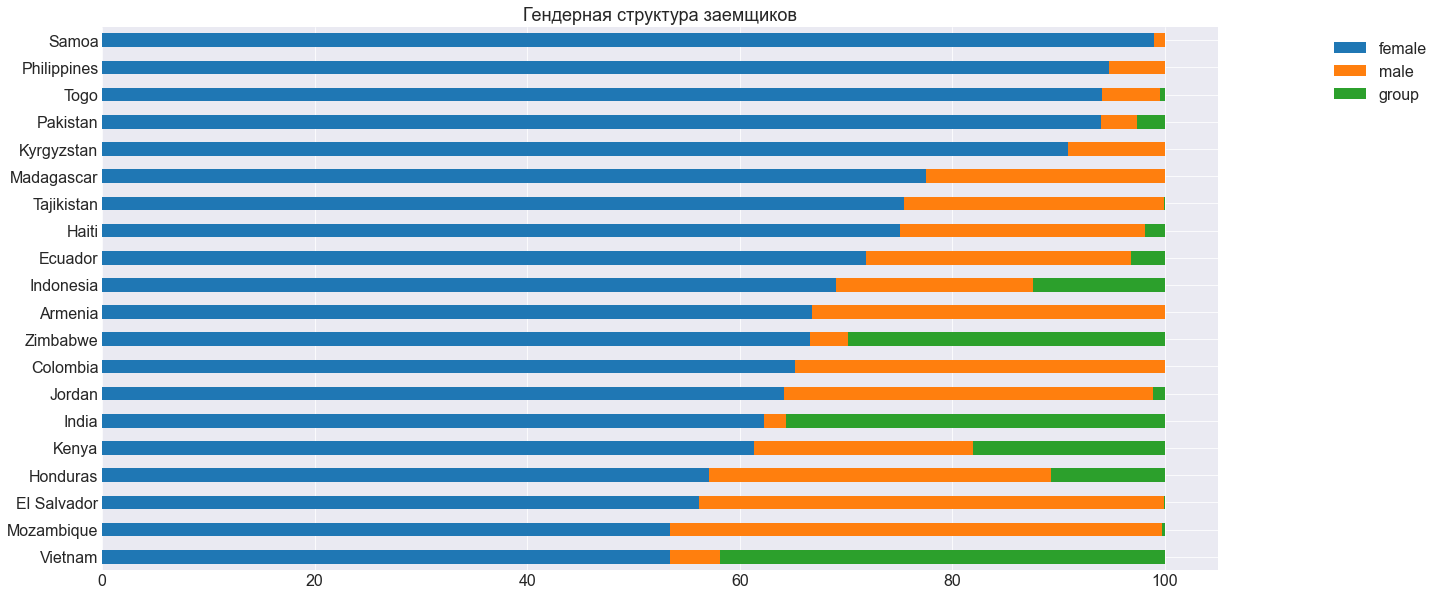

In [237]:
plot = df_gender_by_country.plot.barh(   # barh - строим горизонтальный барплот
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)  # сеттер, чтобы убрать лишние подписи с осей 
plt.show()

#### Выводы:

* Преобладающая доля женщин в структуре заемщиков в разрезе стран может быть связана с направлениями, традиционно ассоциирующимися с женщинами: различного рода точки общественного питания и закусочные, магазины одежды и товаров для дома, бытовые услуги, выращивание сельскохозяйственных культур.

* Также можно отметить наличие в списке стран с преобладающей религией Ислам, в которых женщине пока, к сожалению, отводится второстепенная роль в принятии решений. 

### 3 - А в каких странах преобладают мужчины? 

In [238]:
male_stat = df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male', 'female'], ascending=False)

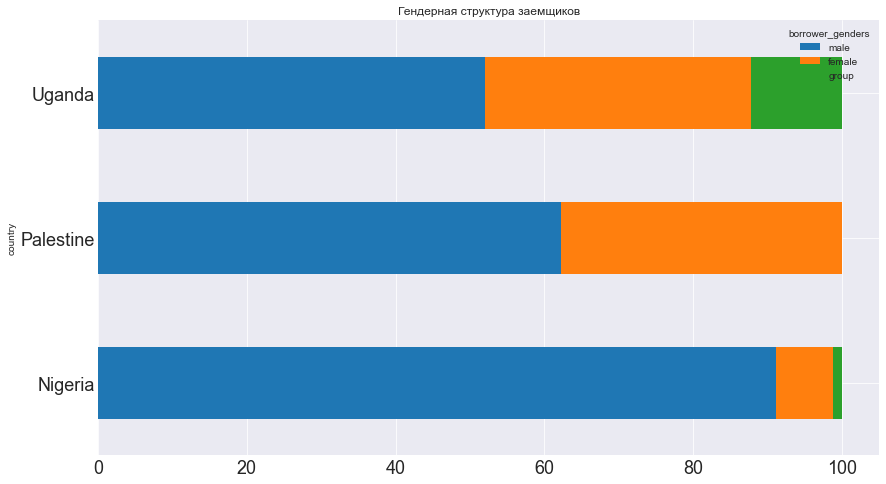

In [239]:
male_stat[(male_stat.male > male_stat.female) & (male_stat.male > male_stat.group)][['male', 'female', 'group']].plot.barh(   
        figsize=(14, 8)
        , fontsize=18
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

### 4 - И группы людей?

In [240]:
group_stat = df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(['group'], ascending=False)

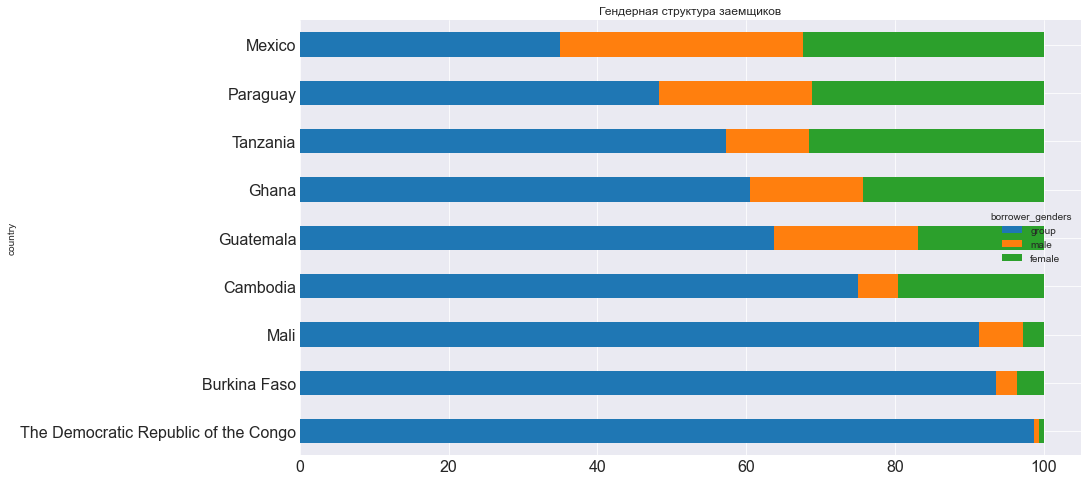

In [241]:
group_stat[(group_stat.group > group_stat.female) &(group_stat.group > group_stat.male)][['group', 'male', 'female']].plot.barh(   # barh - строим горизонтальный барплот
        figsize=(14, 8)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

### 5 - Изучите несколько займов с большими суммами (> 20 000). Что можно сказать о назначении этих заявок? В каких странах они оформлены? 

In [242]:
# Выберем все займы > 20 000 и отфильтруем их в порядке убывания:

big_loans = df_kiva_loans[df_kiva_loans.loan_amount > 20000].sort_values(by='loan_amount', ascending=False)
big_loans.shape[0]

79

In [243]:
# Получилось всего 79 стран

# Теперь выведем топ-10 стран, жители которых взяли займов на сумму больше 20 000:

top_10 = big_loans[['country', 'loan_amount', 'sector', 'use']].reset_index(drop=True).head(10)
top_10

,country,loan_amount,sector,use
0,Haiti,100000.0,Agriculture,create more than 300 jobs for women and farmer...
1,Peru,50000.0,Retail,to buy and sell Barefoot Power's Solar Lightin...
2,Zimbabwe,50000.0,Retail,to distribute solar home systems throughout ru...
3,Ghana,50000.0,Health,To purchase raw materials in order to produce ...
4,Ghana,50000.0,Agriculture,"to expand weather, farming information and fin..."
5,Kenya,50000.0,Agriculture,To pay smallholder coffee farmers in rural Ken...
6,Tanzania,50000.0,Agriculture,to purchase chicken feed & a delivery vehicle ...
7,Mozambique,50000.0,Retail,to train & equip 200 rural merchants in Mozamb...
8,Zambia,50000.0,Retail,to distribute 200+ innovative & affordable pay...
9,Kenya,50000.0,Agriculture,"to enable 5,000 additional small-holder farmer..."


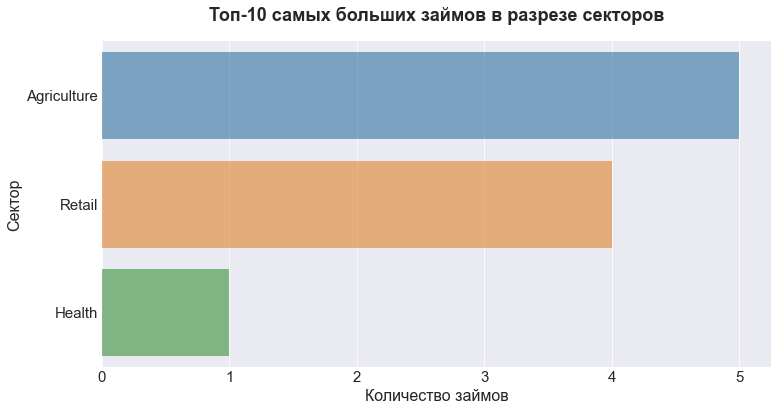

In [244]:
# А теперь посмотрим о назначении займов в разрезе секторов:

sectors = top_10['sector'].value_counts()

plt.figure(figsize=(12,6))
plt.title("Топ-10 самых больших займов в разрезе секторов", fontweight='bold', fontsize=18, pad=20)
plt.xlabel('Количество займов', fontsize=16)
plt.ylabel("Сектор", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

In [245]:
top_10.sector.value_counts()

Agriculture    5
Retail         4
Health         1
Name: sector, dtype: int64

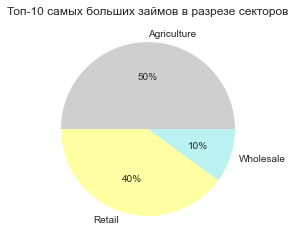

In [246]:
# И для наглядности посмотрим в процентном соотношении:

sectors = top_10.sector.value_counts()
colors = sns.color_palette('pastel')[7:]
plt.pie(sectors, labels=['Agriculture', 'Retail', 'Wholesale'], colors=colors, autopct='%.0f%%')
plt.title('Топ-10 самых больших займов в разрезе секторов')
plt.show()

In [247]:
# Посмотрим более детально на целевое назначение этих займов:

activities = top_10['use'].value_counts()
activities

to distribute solar home systems throughout rural Zimbabwe with pay-as-you-go credit                                                                                     1
to distribute 200+ innovative & affordable pay-as-you-go Solar Home Systems across Zambia                                                                                1
to enable 5,000 additional small-holder farmers across rural Kenya to sustainably harvest croton nuts—an abundant and indigenous crop with no previous commercial use    1
to expand weather, farming information and financing for 500 cocoa farmers through mobile services in Ghana.                                                             1
To pay smallholder coffee farmers in rural Kenya 50%+ above-market, Fairtrade prices for their specialty coffees                                                         1
create more than 300 jobs for women and farmers in rural Haiti.                                                                                  

* для укрепления логистики распределения доступной воды в недостаточно обслуживаемых населенных пунктах Гаити
* Чтобы покупать и продавать продукцию Barefoot Power для солнечного освещения
* распространить 200+ инновационных и доступных по цене солнечных домашних систем по всей Замбии
* обеспечить доход более 600 рыбакам в Танзании
* удвоить объем экспорта орехов кешью и нанять около 200 новых работников
* создать более 300 рабочих мест для женщин и фермеров в сельских районах Гаити
* на приобретение корма для кур и транспортного средства для доставки, чтобы расширить птицеводческий бизнес в Танзании, принадлежащий женщинам, и охватить 5000 сельских домохозяйств
* расширение погодных условий, информации о сельском хозяйстве и финансирования для 500 фермеров, выращивающих какао, с помощью мобильных услуг в Гане
* платить 600 фермерским семьям на 100% выше рыночных цен при уважении к культурам коренных народов Анд
* обеспечение возможностей для получения дохода на отдаленных индонезийских островах, где остро ощущается бедность

### Выводы:

* Как видно на графике, топ-10 самых больших займов были взяты людьми на такие сферы деятельности, как Сельское хозяйство, Розничная и Оптовая торговля.
* Причем Сельское хозяйство занимает больше половины (60%) из них. Можно сделать ряд выводов о структуре экономик этих стран, свидетельствующих о том, что это сугубо развивающиеся страны, полагающиеся преимущественно на аграрную отрасль.
* Топ-10 стран, в которых были взяты эти займы, с высоким уровнем бедности (6 из 10 этих стран - из Африки, оставшиеся - из Центральной и Южной Америки и Индонезии, тоже довольно бедные).
* Это предположение подтверждается, если посмотреть на целевое назначение этих займов - кроме сельского хозяйства есть такие пункты, как "укрепление логистики распределения доступной воды в недостаточно обслуживаемых населенных пунктах Гаити" и "обеспечение возможностей для получения дохода на отдаленных индонезийских островах, где остро ощущается бедность". Это означает, что есть люди, которые используют Kiva, потому что крайне нуждаются.

### 6 - Попробуйте найти связь между странами (макрорегионами), полом заемщика и суммой заявки. Какие выводы можно сделать из этих данных?

In [248]:
# Сгруппируем страны по частям света

# Для этого воспользуемся датасетом df_mpi:

df_mpi_grouped = df_mpi.groupby(['ISO', 'country', 'world_region'])['MPI'].mean().fillna(0).reset_index()

In [249]:
# Соединим 2 наших датасета:

df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country', suffixes=('_x', '')) 

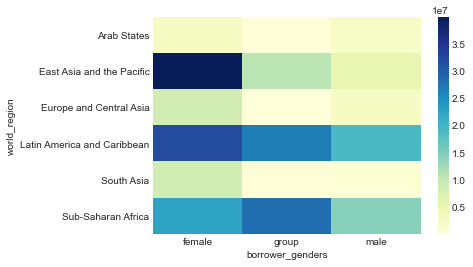

In [250]:
# И построим график:

sns.heatmap(df_kiva_loans.groupby(by=['world_region', 'borrower_genders']).sum().sort_values(by='loan_amount', ascending=False)
            ['loan_amount'].unstack(),  cmap="YlGnBu")

plt.show()

### Выводы:

* На графике отчетливо видно, что почти во всех странах женщины берут больше займов, чем группы и мужчины.

* Исключение составляют арабские страны, где все 3 категории берут очень мало займов. Это может быть связано не только с тем, что там нет острой нужды (как сказано выше), как и с тем, что некоторые классические практики шариата включают серьезные нарушения прав человека, гендерного равенства и свободы слова (а именно, им нельзя брать ипотеки, кредиты и тд).

* И Африка к югу от Сахары, где группы берут больше всего займов. Возможно, это связано с тем, что они живут там племенами.

* В Южной Азии преобладают небольшие займы, что может быть связано с высоким уровнем бедности и острой нужды на предметы первой необходимости для жизни (как говорилось выше)

### 7 - Зависимость пола заёмщика от региона планеты, сектора экономики

In [251]:
# Подсчитаем кол-во займов по макрорегионам:

regions = df_kiva_loans['world_region'].value_counts()
list_regions = list(regions.index)
regions

East Asia and the Pacific      125219
Sub-Saharan Africa              98053
Latin America and Caribbean     75599
South Asia                      21080
Europe and Central Asia         15556
Arab States                      6260
Name: world_region, dtype: int64

In [252]:
df_gender_by_regions = \
    df_kiva_loans[df_kiva_loans['world_region'].isin(regions.index.values)]\
    .groupby(['world_region', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])

df_gender_by_regions = df_gender_by_regions[['female', 'male', 'group']]
df_gender_by_regions

borrower_genders,female,male,group
world_region,,,
Arab States,45.575080,44.009585,10.415335
Sub-Saharan Africa,50.516557,26.893619,22.589824
Latin America and Caribbean,53.795685,32.401222,13.803093
Europe and Central Asia,75.417845,24.537156,0.044999
East Asia and the Pacific,77.045816,6.249052,16.705133
South Asia,94.093928,3.287476,2.618596


In [253]:
# Подсчитаем кол-во займов по секторам экономики:

sectors = df_kiva_loans['sector'].value_counts()
list_sectors = list(sectors.index)
sectors

Agriculture       117496
Food               80786
Retail             71671
Services           29314
Personal Use       26185
Education          24169
Housing            20578
Clothing           20322
Transportation      9477
Arts                7888
Health              6484
Construction        3976
Manufacturing       3810
Entertainment        466
Wholesale            459
Name: sector, dtype: int64

In [254]:
df_gender_by_sectors = \
    df_kiva_loans[df_kiva_loans['sector'].isin(sectors.index.values)]\
    .groupby(['sector', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])

df_gender_by_sectors = df_gender_by_sectors[['female', 'male', 'group']]
df_gender_by_sectors

borrower_genders,female,male,group
sector,,,
Personal Use,22.069887,19.503533,58.426580
Construction,37.474849,51.509054,11.016097
Entertainment,45.278970,48.283262,6.437768
Wholesale,46.623094,43.355120,10.021786
Manufacturing,47.244094,40.288714,12.467192
Transportation,52.875383,43.378706,3.745911
Agriculture,53.988221,25.960884,20.050895
Health,57.371993,31.647131,10.980876
Education,58.591584,37.895651,3.512764


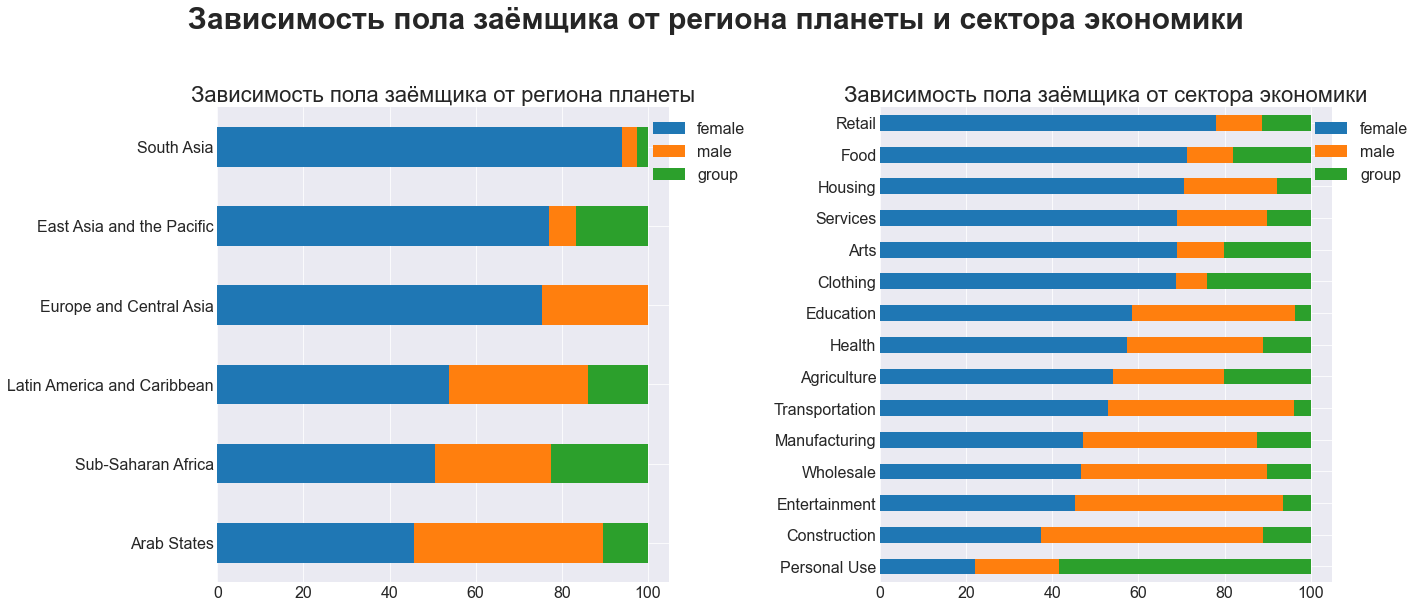

In [255]:
# Построим графики:

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20,6))

df_gender_by_regions.plot.barh(   
        figsize=(20,8)
        , fontsize=16
        , stacked=True
        , ax=ax
        , title='Зависимость пола заёмщика от региона планеты')

ax.title.set_size(22)
ax.set(ylabel=None, xlabel=None)
ax.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)       
        
df_gender_by_sectors.plot.barh(   
        figsize=(20,8)
        , fontsize=16
        , stacked=True
        , ax=ax2
        , title='Зависимость пола заёмщика от сектора экономики')

ax2.title.set_size(22)
ax2.set(ylabel=None, xlabel=None)
ax2.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)  

fig.suptitle('Зависимость пола заёмщика от региона планеты и сектора экономики', fontweight='bold', y = 1.05, fontsize=30)
plt.tight_layout()
plt.show()

**Выводы**

* По графику можно заметить, что почти во всех макрорегионах (кроме Арабских стран) женщины берут больше всего займов.
* Затем идут где-то группы, где-то мужчины. 
* Связано это может быть с тем, как уже говорилось выше, что права женщин во многих странах ущемлены и они имеют меньше возможностей на свою реализацию, поэтому и чаще обращаются за помощью KIVA.


* Сектора экономики, где подавляющее большинство займов берут женщины, как уже говорилось выше, больше подходят для женского труда - это торговля, одежда, еда, образование и т. д.
* Мужчины тоже работают в этих сферах, но меньше.

### 8 - Влияние такого атрибута займа, как Количество кредиторов (lender_count), на суммы и сроки займов

### Удаление выбросов

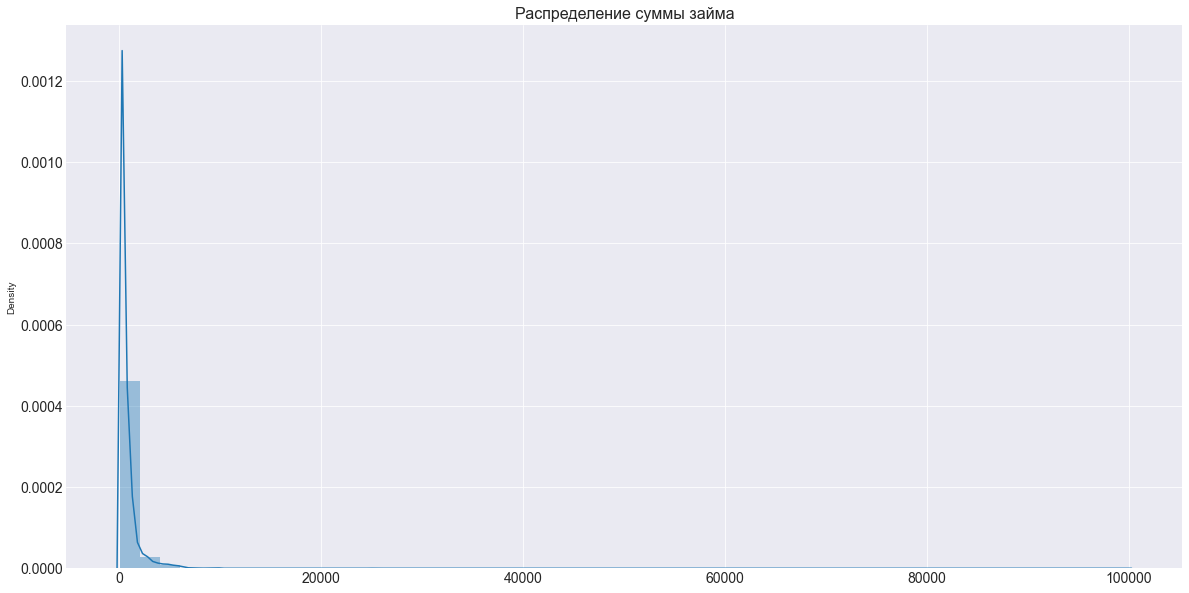

In [256]:
# Посмотрим на график распределения сумм займов:

plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)
plt.show()

Налицо наличие ряда предельных значений (выбросов). Они искажают распределение, и график не очень-то информативен в этой форме: нам нужно **усечь данные**, исключив выбросы из рассмотрения. 

Используем основное, но очень мощное правило: правило 3-х сигм - **68–95–99.7**. Это правило гласит, что для нормального распределения:
* 68.27% значений $ \in [\mu - \sigma , \mu + \sigma]$
* 95.45% значений $ \in [\mu - 2\sigma , \mu + 2\sigma]$
* 99.7% значений $ \in [\mu - 3\sigma , \mu + 3\sigma]$  
где $\mu$ и $\sigma$ - среднее значение и стандартное отклонение нормального распределения.

Это значит, что мы можем посчитать среднее, т е $\mu$, среднеквадратическое отклонение, т е $\sigma$ и отсечь ту часть наших данных, которые находятся дальше, чем в трех сигмах от центра распределения.

По сути, **это правило говорит о том, что снаружи интервала находится всего 0,3 % реальных данных. Это и есть те самые выбросы**, от которых мы хотим избавиться.

Здесь верно, что распределение не обязательно нормальное, но для формы, подобной той, которая у нас есть, мы увидим, что применение третьего фильтра **значительно улучшит наши результаты**.

<img src="https://www.researchgate.net/profile/Bin_Wang111/publication/273955667/figure/fig3/AS:339883190177813@1458045875582/The-confidence-intervals-correspond-to-3-sigma-rule-of-the-normal-distribution.png" width="850" height="442" />


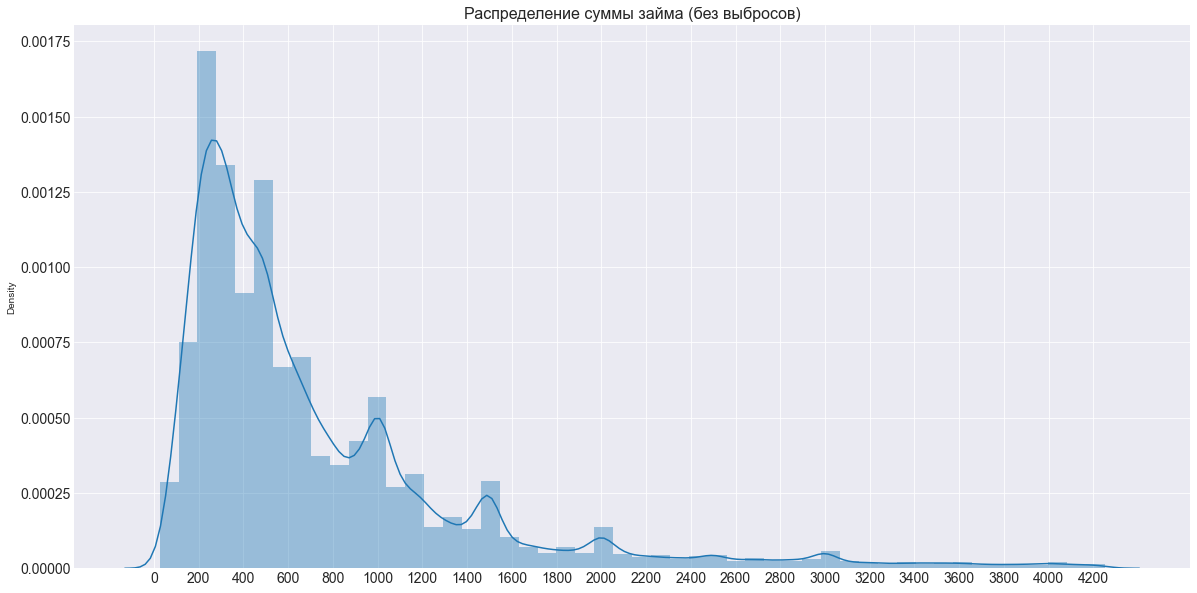

In [257]:
# Наблюдаемое отклонение от среднего:
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()

# Стандартное отклонение:
std = df_kiva_loans['loan_amount'].std()

# Фильтруем исходный набор данных:
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

# Построим график еще раз:
plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['loan_amount']+1), 200))

sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
plt.show()

Теперь явно намного лучше!

* Большинство ссуд составляют от 100 до 600 долл. США с пиковыми значения в районе 200 и 400 долл. США.
* Сумма естественно уменьшается, но мы можем заметить наличие еще нескольких пиков в 1000 (наиболее четкий), 1500 и 2000 долл. США. Можно предположить, что есть определенный класс проектов, которые являются более «сложными» и финансируются бОльшими суммами.

In [258]:
# По сути, нам нужно посмотреть медиану по срокам выплаты и сумме займа, 
# разбив значения на группы, допустим, таким образом:

bins = [0, 3, 7, 12, 23, 100, 268]

df_kiva_loans_trimmed['binned'] = pd.cut(df_kiva_loans_trimmed['lender_count'], bins=bins)

In [259]:
# Посчитаем медиану:

df_binned_median = df_kiva_loans_trimmed.groupby(['binned']).agg({'loan_amount' : 'median', 'term_in_months' : 'median'}).reset_index()

df_binned_median = df_binned_median.sort_values(by='binned')
df_binned_median.head()

,binned,loan_amount,term_in_months
0,"(0, 3]",200.0,8.0
1,"(3, 7]",200.0,9.0
2,"(7, 12]",300.0,13.0
3,"(12, 23]",525.0,14.0
4,"(23, 100]",1175.0,14.0


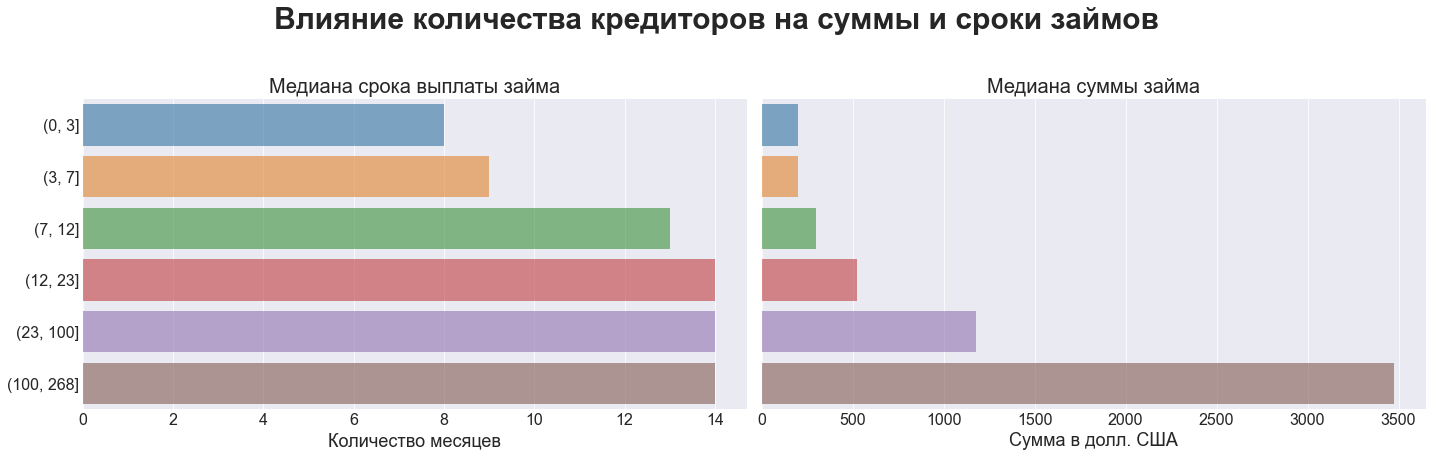

In [260]:
fig, ax=plt.subplots(1, 2, sharey=True, figsize=(20,6))

sns.barplot(y='binned', x='term_in_months', data=df_binned_median, alpha=0.6, ax=ax[0], ci=None)
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='binned', x='loan_amount', data=df_binned_median, alpha=0.6, ax=ax[1], ci=None)
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

fig.suptitle('Влияние количества кредиторов на суммы и сроки займов', fontweight='bold', y = 1.05, fontsize=30)
plt.tight_layout()
plt.show()

# ci=None - убирает черные полоски (доверительные интервалы) со столбцов

**Выводы**

* По графику видно, что чем больше кол-во кредиторов, тем больше займы и сроки выплаты займов.
* В среднем, суммы, что выплачиваются до года, включают в себя до 20 кредиторов. До 16 месяцев - до 100 кредиторов, а до 18 - 268 соответственно.
* С суммами займов ситуация похожая - до 500 долларов - до 20 кредиторов, до 1500 - до 100 и до 3500 - до 268 соответственно.
* Возможно, это связано с тем, что суммы там намного больше, а потому и выплачиваются дольше.

### 9 - Влияние показателя MPI (многомерный индекс бедности) в разных странах на суммы займов и сроки погашения

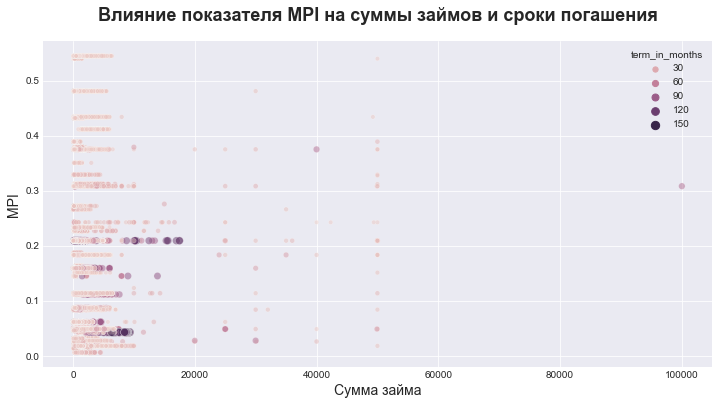

In [261]:
data = df_kiva_loans

fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot(data=data, x='loan_amount', y='MPI', ax=ax, hue='term_in_months', alpha=0.5, size='term_in_months')

ax.set_title('Влияние показателя MPI на суммы займов и сроки погашения', fontweight='bold', fontsize=18, pad=20)
ax.set_xlabel('Сумма займа', fontsize=14)
ax.set_ylabel('MPI', fontsize=14)

plt.show()

**Выводы**

* Можем заметить, что чем выше индекс бедности, тем меньше сроки погашения займов
* Возможно, это связано с тем, что люди там берут меньшие суммы (примерно до 10000 долларов)
* Самые большие сроки наблюдаются в странах со средним уровнем бедности (0.2) на суммы от 10000 до 20000 долларов
* И в странах с низким кровнем бедности (до 0.1) на разные суммы от 3000 до 50000 долларов
* Возможно, потому что там люди могут себе позволить брать большие суммы и, соответственно, на более долгий срок

### 10 - Зависимости таких метрик, как «Сумма займа», «Срок займа», «Время финансирования заявки», «Ежемесячный платёж», в разрезе макрорегионов

У нас есть две колонки, которые помогут в нашем исследовании:

* **posted_time**: соответствует дате + точный час, когда заявка появилась на сайте.
* **disbursed_time**: соответствует дате + точный час, когда деньги фактически были получены адресатом.

1. Отбрасываем строки с пропущенными значениями для «disbursed_time», получаем столбцы в правильном формате.
2. Вычисляем интервал между датами.
3. Исключим из рассмотрения заявки, для которых деньги сначала фактически выдаются агентами на местах и только потом публикуются на сайте.

In [262]:
# drop na (missing) values
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

# dates columns:
dates = ['posted_time','disbursed_time']

# format dates:
df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x : x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

# calculate time interval
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1) 

# remove outliers +-3 sigma
dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()
# Keep rows where time_funding interval > 0 only
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]

In [263]:
# Теперь сгруппируем наши строки по странам и посчитаем медианные значения по сумме займа  
# и времени финансирования заявок в каждой конкретной стране:

df_country_median = df_loans_dates_trimmed.groupby(['world_region', 'country'])\
    .agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

df_country_median = df_country_median[df_country_median.country.isin(list_countries)].sort_values(by='time_funding')

In [264]:
# Наконец, рассчитаем сумму ежемесячного платежа в разрезе стран (как соотношение суммы кредита и времени погашения)

# Это даст представление о том, сколько денег в месяц человек в данной стране 
# может позволить себе тратить на погашение кредитов:

df_country_median = df_country_median.sort_values(by='term_in_months')

In [265]:
df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']

In [266]:
df_regions_median = df_loans_dates_trimmed.groupby(by=['world_region'])\
    .agg({'loan_amount' : 'median', 'term_in_months' : 'median', 'time_funding' : 'median'})\
    .reset_index()

df_regions_median = df_country_median.sort_values(by='world_region')
df_regions_median.head()

,world_region,country,loan_amount,time_funding,term_in_months,monthly_repayment
1,Arab States,Jordan,887.5,13.910480,17.5,50.714286
3,East Asia and the Pacific,Cambodia,487.5,8.964902,17.0,28.676471
8,East Asia and the Pacific,Philippines,400.0,1.925278,12.0,33.333333
5,East Asia and the Pacific,Indonesia,1050.0,5.685833,11.0,95.454545
10,Europe and Central Asia,Tajikistan,525.0,9.066956,13.0,40.384615


In [267]:
df_regions_median['monthly_repayment'] = df_regions_median['loan_amount'] / df_regions_median['term_in_months']

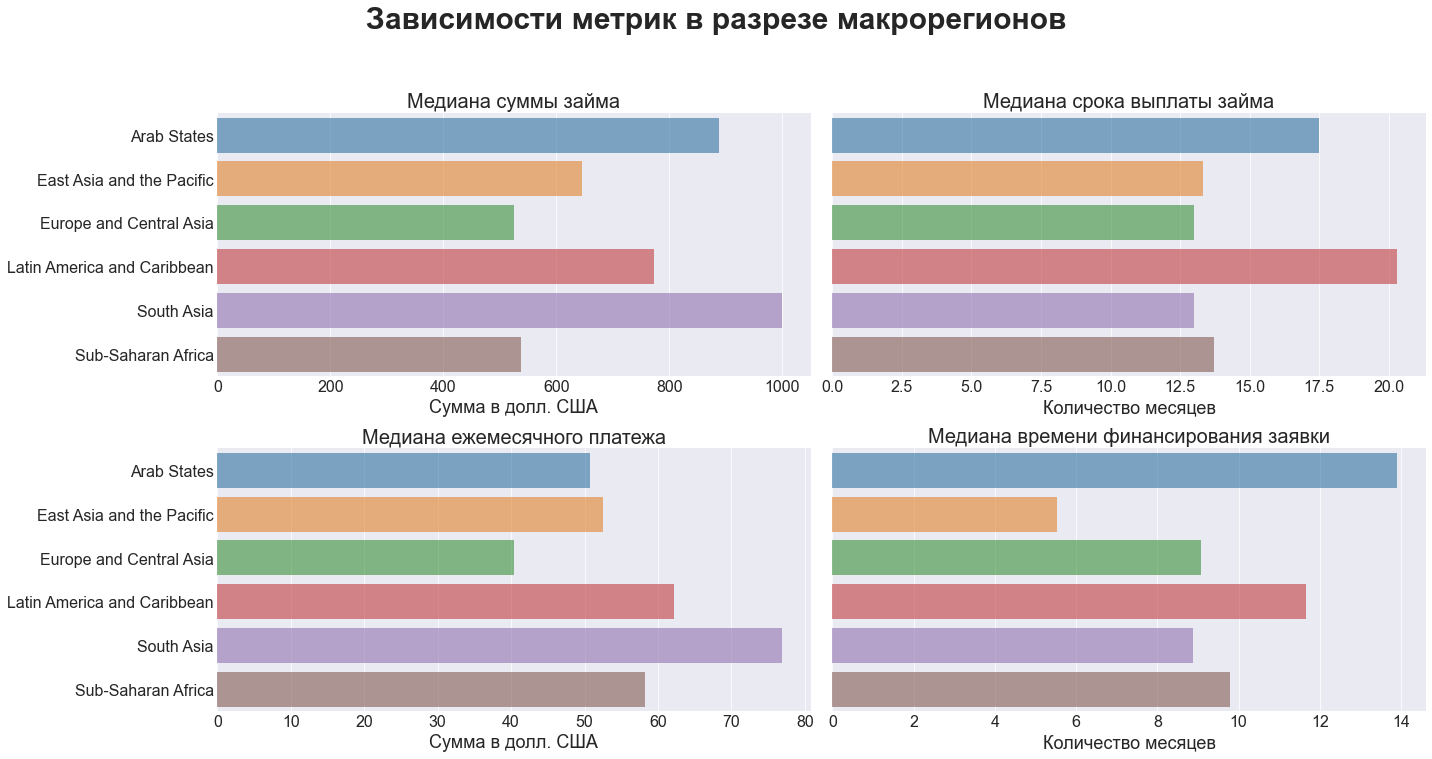

In [268]:
# Построим графики:

fig, axs =plt.subplots(2, 2, sharey=True, figsize=(20,10))

sns.barplot(y='world_region', x='loan_amount', data=df_regions_median, alpha=0.6, ax=axs[0][0], ci=None)
axs[0][0].set_title("Медиана суммы займа", fontsize=20)
axs[0][0].set_xlabel('Сумма в долл. США', fontsize=18)
axs[0][0].set_ylabel(None)
axs[0][0].tick_params(labelsize=16)

sns.barplot(y='world_region', x='term_in_months', data=df_regions_median, alpha=0.6, ax=axs[0][1], ci=None)
axs[0][1].set_title("Медиана срока выплаты займа", fontsize=20)
axs[0][1].set_xlabel('Количество месяцев', fontsize=18)
axs[0][1].set_ylabel(None)
axs[0][1].tick_params(labelsize=16)

sns.barplot(y='world_region', x='monthly_repayment', data=df_regions_median, alpha=0.6, ax=axs[1][0], ci=None)
axs[1][0].set_title("Медиана ежемесячного платежа", fontsize=20)
axs[1][0].set_xlabel('Сумма в долл. США', fontsize=18)
axs[1][0].set_ylabel(None)
axs[1][0].tick_params(labelsize=16)

sns.barplot(y='world_region', x='time_funding', data=df_regions_median, alpha=0.6, ax=axs[1][1], ci=None)
axs[1][1].set_title("Медиана времени финансирования заявки", fontsize=20)
axs[1][1].set_xlabel('Количество месяцев', fontsize=18)
axs[1][1].set_ylabel(None)
axs[1][1].tick_params(labelsize=16)

fig.suptitle('Зависимости метрик в разрезе макрорегионов', fontweight='bold', y = 1.05, fontsize=30)
plt.tight_layout()
plt.show()

**Выводы**

* Можем заметить, что самые большие займы выдаются в Арабских странах и Европе с Центральной Азией - самых богатых регионах.
* Самые небольшие займы - в Восточной Азии и Африке к югу от Сахары - самых бедных регионах.
* Отсюда можно сделать вывод, что чем богаче регион, тем больше суммы займов и, соответственно, чем беднее - тем ниже.


* Ежемесячные платежи так же самые большие в Арабских странах, но срок выплаты займа на среднем уровне.
* В отличие от Европы с Центральной Азией, где при примерно таких же больших суммах займов, срок выплаты почти в 2 раза дольше, так как ниже ежемесячный платеж.
* Отсюда можно сделать вывод, что Арабские страны самые лучшие плательщики - берут крупные суммы на небольшие сроки и гасят их достаточно большими платежами.


* Самое большое время финансирования заявок с транах Европа и Центральная Азия и Латинская Америка и Карибы.
* В случае Европы с Центральной Азией это может быть связано с тем, что там берут самые курупные суммы займов на самые большие сроки с относительно невысокими ежемесячными платежами, поэтому и срок рассмотрения более долгий, что логично.
* А вот с чем связано высокое время ожидания финансирования для стран Латинской Америки и Карибов не очень понятно - ведь там выдаются средние суммы займов (не очень большие и не маленькие) на средний срок, который гасится довольно высокими ежемесяными платежами (на 2-м месте после Арабских стран). Возможно, KIVA надо уделить этому моменту больше внимания, проверить, в чем же дело и сократить для этого региона время ожидания финансирования.